# Explore Offer Types

Load cleaned data, perform (visual) exploration of the 3 different offer types (the 10 initial offers were aggregated by offer_type for this step). Again, after some basic analysis, I exploratory tried to find customers that prefer one type to the other, but the results were not convincing.

### Data Sources

Cleaned datafiles, as prepared in notebook 1: `profile_type_clean.csv`: demographic data and KPI for each of the offer types per customer.

### Changes

- 2019-01-22: Started notebook
- 2091-01-28: Stopped exploration


In [3]:
# load libraries

import numpy as np
import pandas as pd
from tqdm import tqdm

# my own custom functions
import EDA_functions as EDA
import cleaning_functions as cleaning

# visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')
color = 'rebeccapurple'
%matplotlib inline

# display settings
from IPython.display import display
pd.options.display.max_columns = None

from pathlib import Path  # to make file path references relative to notebook directory

In [4]:
# import preparated data

profile_type_file = Path.cwd() / "data" / "processed" / "profile_type_clean.csv"
profile_type = pd.read_csv(profile_type_file, index_col = 0, dtype={'gender' : 'category'})

## Prepare profile type data

Note: Socio-demographic features for 2'175 customers missing, they won't be interfered for this analysis.

In [3]:
display(profile_type.head())
display(profile_type.info())

,age,gender,income,member_days,offer_received,offer_viewed,offer_completed,viewed_received,completed_viewed,total_trans,total_amount,total_reward,total_profit,prop_reward,total_mean_amount,np_trans,np_amount,np_mean_amount,prop_np_trans,prop_np_amount,bogo_completed,bogo_viewed,bogo_trans,bogo_amount,discount_completed,discount_viewed,discount_trans,discount_amount,info_viewed,info_trans,info_amount,prop_bogo_amount,prop_discount_amount,prop_info_amount,bogo_vtc,discount_vtc
p_1,NaN,NaN,NaN,-529,5.0,5.0,2.0,1.00,2.0,9.0,20.40,5.0,15.40,0.245098,2.266667,0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000,2.0,5.0,9.0,20.400,0.0,0.0,0.000,0.000000,1.000000,0.000000,0.0,0.4
p_10,NaN,NaN,NaN,-611,4.0,3.0,1.0,0.75,0.0,6.0,15.62,5.0,10.62,0.320102,2.603333,3,7.69,2.563333,0.500000,0.492318,0.0,2.0,3.0,7.930,0.0,0.0,0.0,0.000,1.0,0.0,0.000,0.507682,0.000000,0.000000,0.0,0.0
p_100,68.0,F,84000.0,-725,5.0,0.0,1.0,0.00,0.0,2.0,34.04,2.0,32.04,0.058754,17.020000,2,34.04,17.020000,1.000000,1.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.0
p_1000,67.0,M,44000.0,-225,4.0,4.0,0.0,1.00,0.0,5.0,19.78,0.0,19.78,0.000000,3.956000,2,13.37,6.685000,0.400000,0.675935,0.0,3.0,3.0,5.555,0.0,0.0,0.0,0.000,1.0,1.0,0.855,0.280839,0.000000,0.043225,0.0,0.0
p_10000,NaN,NaN,NaN,-446,3.0,3.0,0.0,1.00,0.0,6.0,7.28,0.0,7.28,0.000000,1.213333,1,1.83,1.830000,0.166667,0.251374,0.0,2.0,4.0,3.935,0.0,1.0,3.0,1.515,0.0,0.0,0.000,0.540522,0.208104,0.000000,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, p_1 to p_9999
Data columns (total 36 columns):
age                     14825 non-null float64
gender                  14825 non-null category
income                  14825 non-null float64
member_days             17000 non-null int64
offer_received          17000 non-null float64
offer_viewed            17000 non-null float64
offer_completed         17000 non-null float64
viewed_received         17000 non-null float64
completed_viewed        17000 non-null float64
total_trans             17000 non-null float64
total_amount            17000 non-null float64
total_reward            17000 non-null float64
total_profit            17000 non-null float64
prop_reward             17000 non-null float64
total_mean_amount       17000 non-null float64
np_trans                17000 non-null int64
np_amount               17000 non-null float64
np_mean_amount          17000 non-null float64
prop_np_trans           17000 non-null float64
pro

None

In [4]:
"""remove oultiers"""

# count outliers (<> IQR=1.5)
cleaning.count_outliers_IQR_method(profile_type)

age
Identified outliers: 0
Percentage of outliers: 0.0%

income
Identified outliers: 0
Percentage of outliers: 0.0%

member_days
Identified outliers: 287
Percentage of outliers: 1.7%

offer_received
Identified outliers: 689
Percentage of outliers: 4.1%

offer_viewed
Identified outliers: 981
Percentage of outliers: 5.8%

offer_completed
Identified outliers: 0
Percentage of outliers: 0.0%

viewed_received
Identified outliers: 0
Percentage of outliers: 0.0%

completed_viewed
Identified outliers: 16
Percentage of outliers: 0.1%

total_trans
Identified outliers: 296
Percentage of outliers: 1.7%

total_amount
Identified outliers: 521
Percentage of outliers: 3.1%

total_reward
Identified outliers: 82
Percentage of outliers: 0.5%

total_profit
Identified outliers: 606
Percentage of outliers: 3.6%

prop_reward
Identified outliers: 414
Percentage of outliers: 2.4%

total_mean_amount
Identified outliers: 260
Percentage of outliers: 1.5%

np_trans
Identified outliers: 330
Percentage of outliers: 1

In [5]:
# clean outliers for total transactions and total amount
cleaning.remove_outliers_IQR_method(profile_type, outlier_cols=['total_amount', 'total_trans', 'total_mean_amount'])
len(profile_type)

total_amount
Rows removed: 521

total_trans
Rows removed: 265

total_mean_amount
Rows removed: 7


Rows removed in total: 793



16207

## Basic exploration

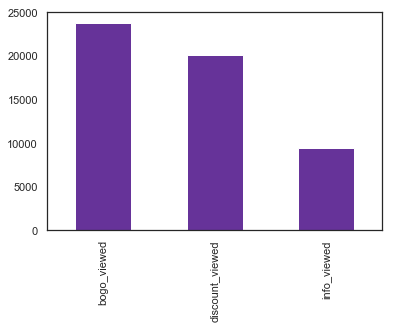

In [6]:
"""display viewed offers per type"""

profile_type[['bogo_viewed', 'discount_viewed', 'info_viewed']].agg(np.sum).plot.bar(color=color);

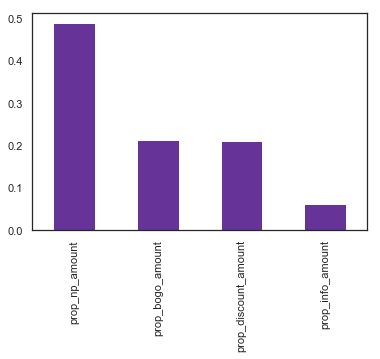

In [7]:
"""display mean proportion of total spendings per type (including non-promo)"""

profile_type[['prop_np_amount', 'prop_bogo_amount', 
              'prop_discount_amount', 'prop_info_amount']].agg(np.mean).plot.bar(color=color);

## Creating distinct customer groups

Trying to isolate customers that have had exposure to only one offer type or to equal number of discount and bogo offers in order to get some control over the variables.

In [8]:
bogos = profile_type.loc[(profile_type['bogo_viewed'] == 2) & (profile_type['discount_viewed'] == 0) & \
                        (profile_type['info_viewed'] == 0)]

discounts = profile_type.loc[(profile_type['discount_viewed'] ==2 ) & (profile_type['bogo_viewed'] == 0) & \
                        (profile_type['info_viewed'] == 0)]

infos = profile_type.loc[(profile_type['info_viewed'] == 2) & (profile_type['bogo_viewed'] == 0) & \
                        (profile_type['discount_viewed'] == 0)]

dis_bos = profile_type.loc[(profile_type['discount_viewed'] == 2 ) & (profile_type['bogo_viewed'] == 2) & \
                        (profile_type['info_viewed'] == 0)]

for name, df in {'bogos' : bogos, 'discounts': discounts, 'infos': infos, 'dis_bos' : dis_bos}.items():
    print(name, len(df))

bogos 710
discounts 414
infos 98
dis_bos 726


In [15]:
"""calculate column with difference between mean amount of promo and non-promo transactions"""

bogos['mean_diff'] = bogos['bogo_amount'] / bogos['bogo_trans'] - bogos['np_mean_amount']
discounts['mean_diff'] = discounts['discount_amount'] / discounts['discount_trans'] - discounts['np_mean_amount']
infos['mean_diff'] = infos['info_amount'] / infos['info_trans'] - infos['np_mean_amount']

C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

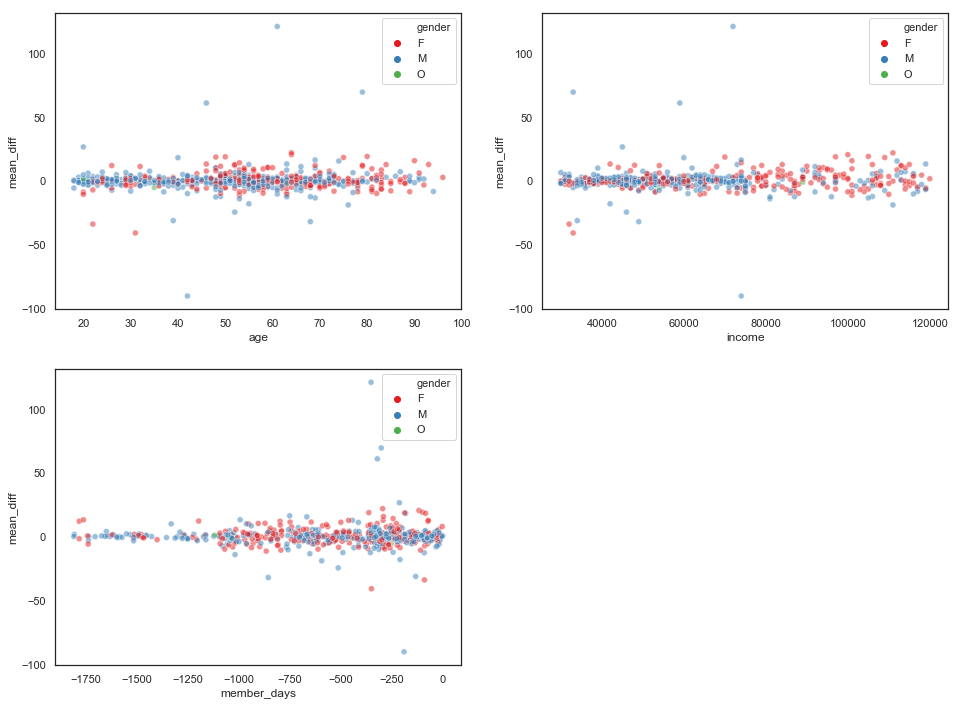

In [16]:
"""zoom in on demographic data"""

zoom_list = ['age', 'income', 'member_days']
plt.figure(figsize=(16,12))

for pos, col in enumerate(zoom_list):
    pos +=1
    plt.subplot((len(zoom_list)/2) + 1, 2 , pos)
    sns.scatterplot(x=col, y='mean_diff', data=bogos, hue='gender', palette="Set1", alpha=0.5)
#     plt.ylim([0, 400])  #  outliers cut off
    plt.legend(loc='upper right');

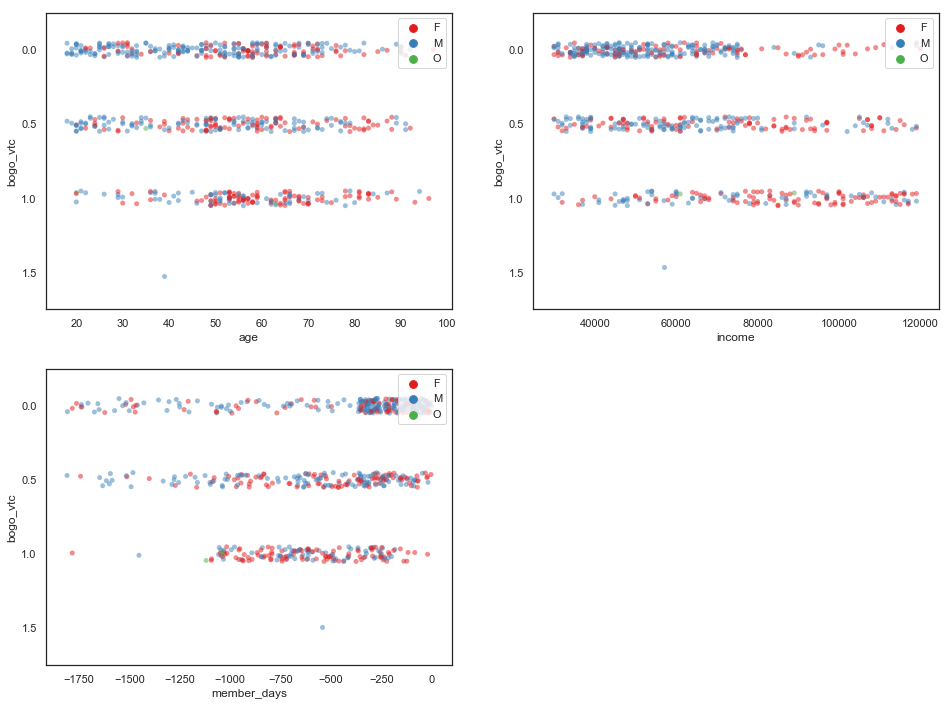

In [22]:
"""zoom in on demographic data"""

zoom_list = ['age', 'income', 'member_days']
plt.figure(figsize=(16,12))

for pos, col in enumerate(zoom_list):
    pos +=1
    plt.subplot((len(zoom_list)/2) + 1, 2 , pos)
    sns.stripplot(x=col, y='bogo_vtc', data=bogos, hue='gender', jitter=True, palette="Set1", alpha=0.5, orient='h')
#     plt.ylim([0, 400])  #  outliers cut off
    plt.legend(loc='upper right');

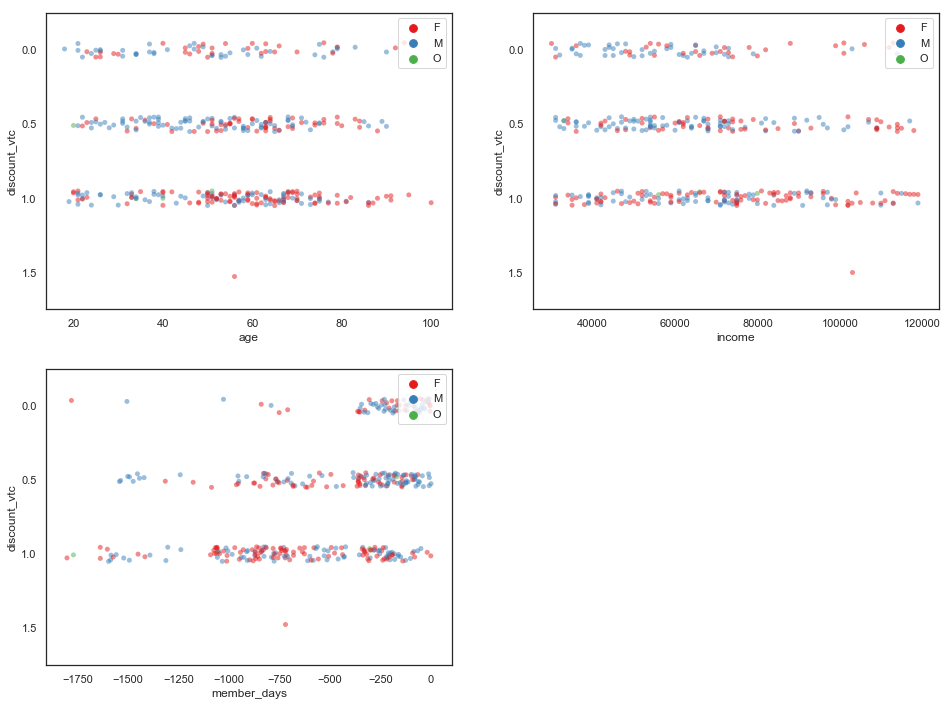

In [23]:
"""zoom in on demographic data"""

zoom_list = ['age', 'income', 'member_days']
plt.figure(figsize=(16,12))

for pos, col in enumerate(zoom_list):
    pos +=1
    plt.subplot((len(zoom_list)/2) + 1, 2 , pos)
    sns.stripplot(x=col, y='discount_vtc', data=discounts, hue='gender', jitter=True, palette="Set1", alpha=0.5, orient='h')
#     plt.ylim([0, 400])  #  outliers cut off
    plt.legend(loc='upper right');

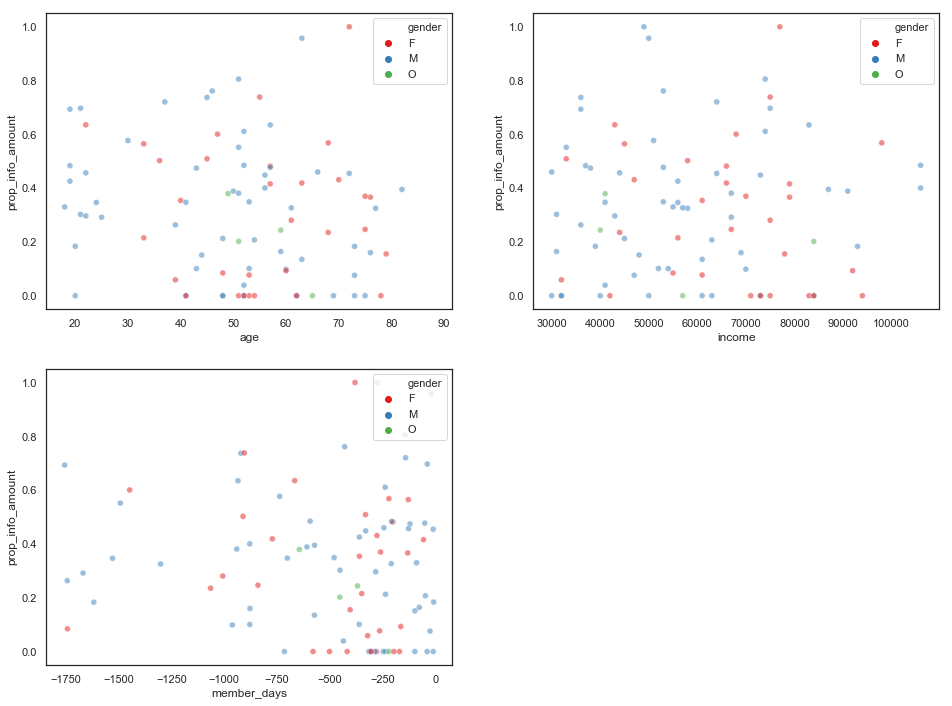

In [27]:
"""zoom in on demographic data"""

zoom_list = ['age', 'income', 'member_days']
plt.figure(figsize=(16,12))

for pos, col in enumerate(zoom_list):
    pos +=1
    plt.subplot((len(zoom_list)/2) + 1, 2 , pos)
    sns.scatterplot(x=col, y='prop_info_amount', data=infos, hue='gender', palette="Set1", alpha=0.5)
#     plt.ylim([0, 400])  #  outliers cut off
    plt.legend(loc='upper right');

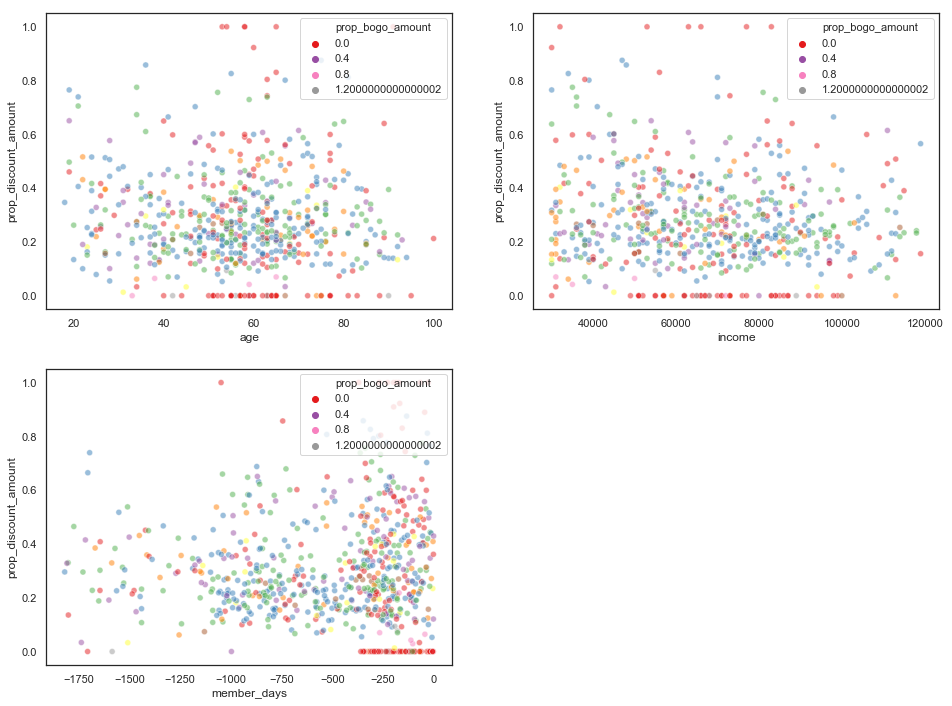

In [28]:
"""zoom in on demographic data"""

zoom_list = ['age', 'income', 'member_days']
plt.figure(figsize=(16,12))

for pos, col in enumerate(zoom_list):
    pos +=1
    plt.subplot((len(zoom_list)/2) + 1, 2 , pos)
    sns.scatterplot(x=col, y='prop_discount_amount', data=dis_bos, hue='prop_bogo_amount', palette="Set1", alpha=0.5)
#     plt.ylim([0, 400])  #  outliers cut off
    plt.legend(loc='upper right');

In [25]:
for col in ['bogo_viewed', 'discount_viewed', 'info_viewed']:
    display(profile_type[col].value_counts().sort_index())

0.0    2991
1.0    5874
2.0    4780
3.0    1984
4.0     502
5.0      70
6.0       6
Name: bogo_viewed, dtype: int64

0.0    4249
1.0    6132
2.0    3989
3.0    1467
4.0     321
5.0      47
6.0       2
Name: discount_viewed, dtype: int64

0.0    8946
1.0    5467
2.0    1523
3.0     236
4.0      34
5.0       1
Name: info_viewed, dtype: int64

4780


C:\Users\r2d4\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


3989
1523


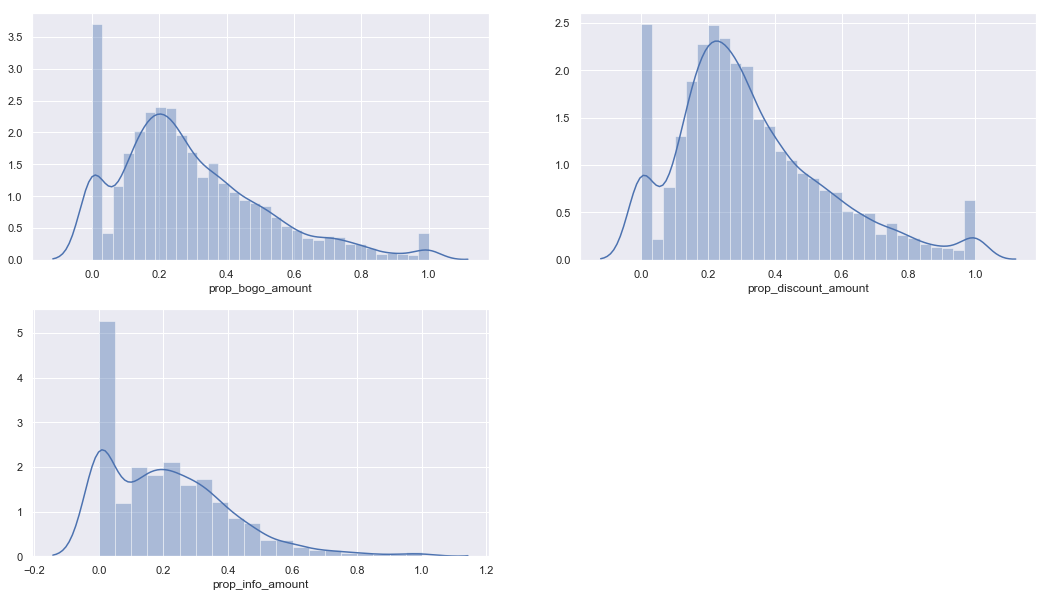

In [38]:
plt.figure(figsize=(18, 10))
for pos, o_type in enumerate(['bogo', 'discount', 'info']):
    temp_df = profile_type.loc[profile_type[o_type + "_viewed"] == 2]
    print(len(temp_df))
    plt.subplot(2, 2, pos+1)
    sns.distplot(temp_df["prop_" + o_type + "_amount"]);
    

In [60]:
def print_boxplots_types(o_type):
    profile_subset = profile_type.loc[profile_type[o_type + '_viewed'] == 2]
    profile_subset['group'] = np.where((profile_subset['prop_' + o_type + '_amount'] >= 0.5), 'high', 'middle')
    profile_subset['group'] = np.where((profile_subset['prop_' + o_type + '_amount'] < 0.1), 'low', profile_subset['group'])
    profile_subset = profile_subset[['age', 'income', 'member_days', 'total_trans', 'total_amount', 'total_mean_amount',
                            'prop_np_amount', 'group', 'gender']]

    print(profile_subset.groupby(['group'])['gender'].value_counts() / len(profile_subset))
    EDA.plot_num_corrBox(profile_subset, 'group', figsize=(16, 24))

C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


group   gender
high    M         0.093096
        F         0.038703
        O         0.000628
low     M         0.072594
        F         0.066946
        O         0.002720
middle  M         0.323849
        F         0.258368
        O         0.008368
Name: gender, dtype: float64


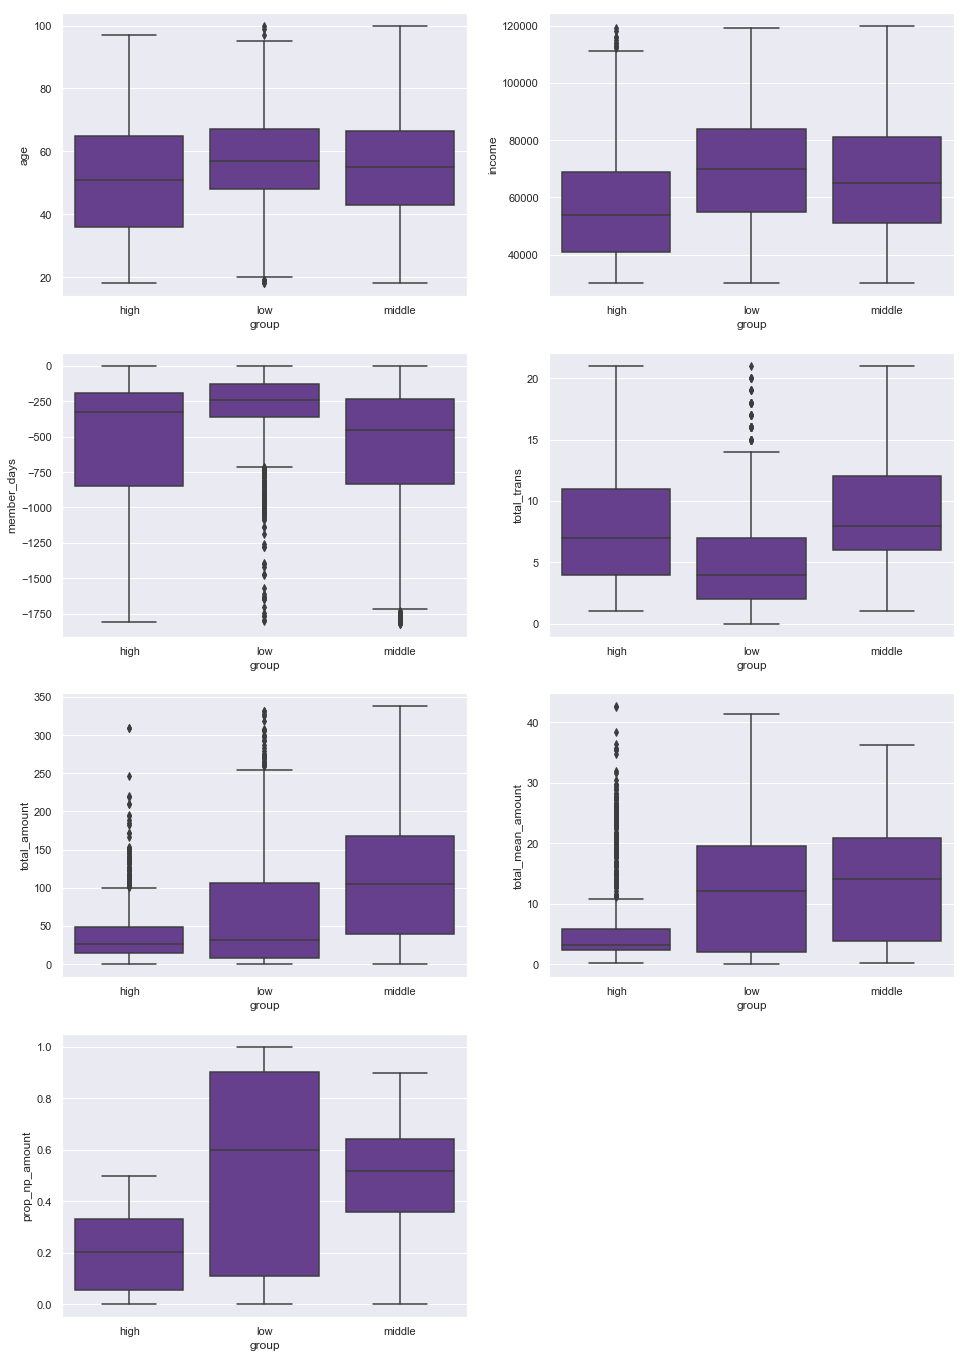

In [61]:
print_boxplots_types('bogo')

C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


group   gender
high    M         0.093507
        F         0.046127
        O         0.002758
low     M         0.047130
        F         0.041614
        O         0.000752
middle  M         0.332163
        F         0.286538
        O         0.008273
Name: gender, dtype: float64


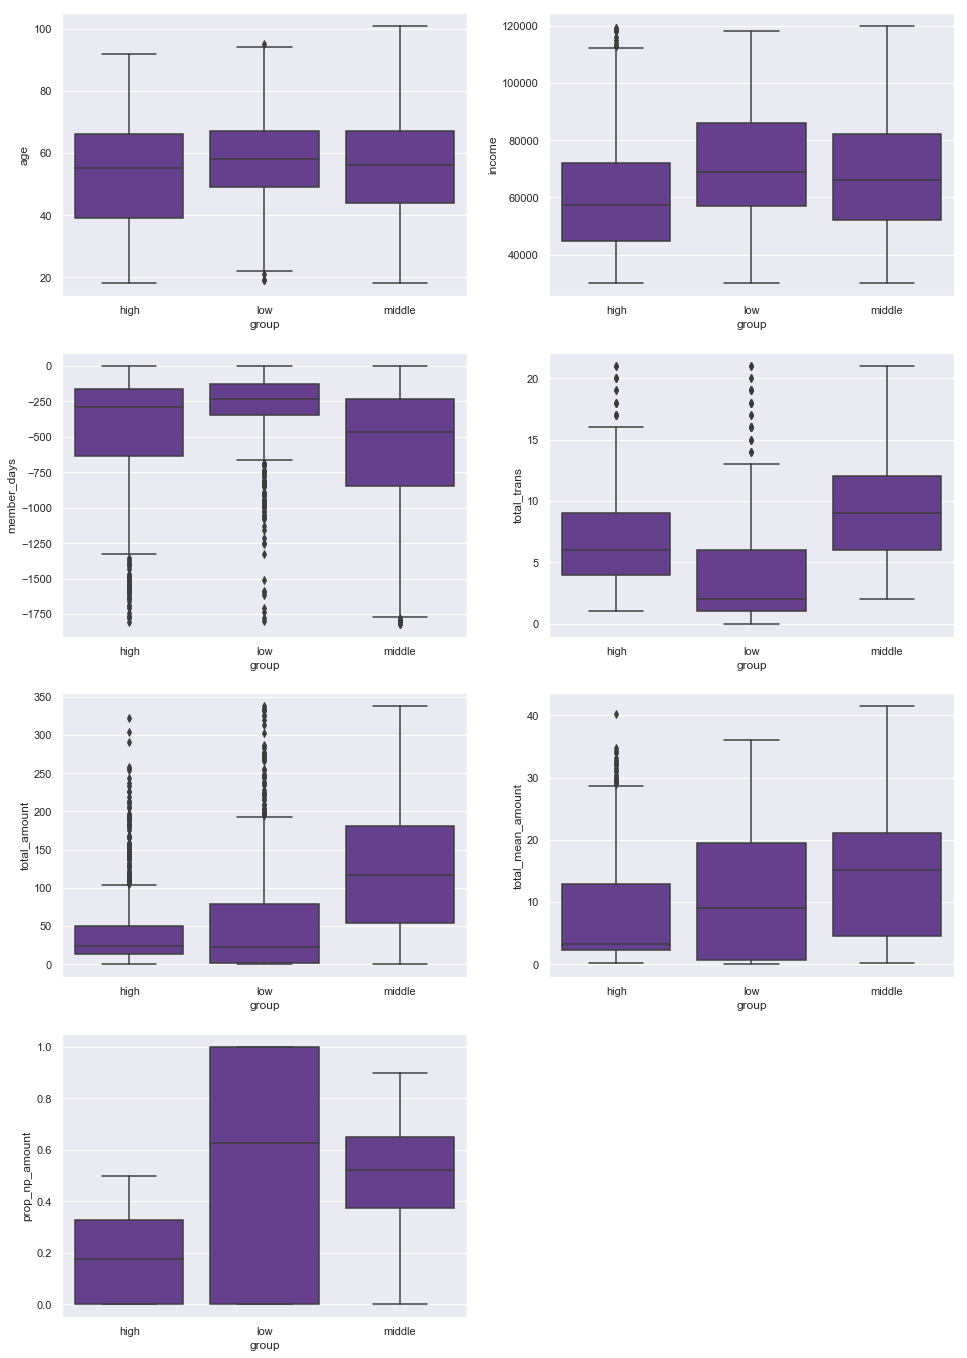

In [62]:
print_boxplots_types('discount')

C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


group   gender
high    M         0.036113
        F         0.024951
low     M         0.147735
        F         0.095863
        O         0.007879
middle  M         0.308601
        F         0.216021
        O         0.009849
Name: gender, dtype: float64


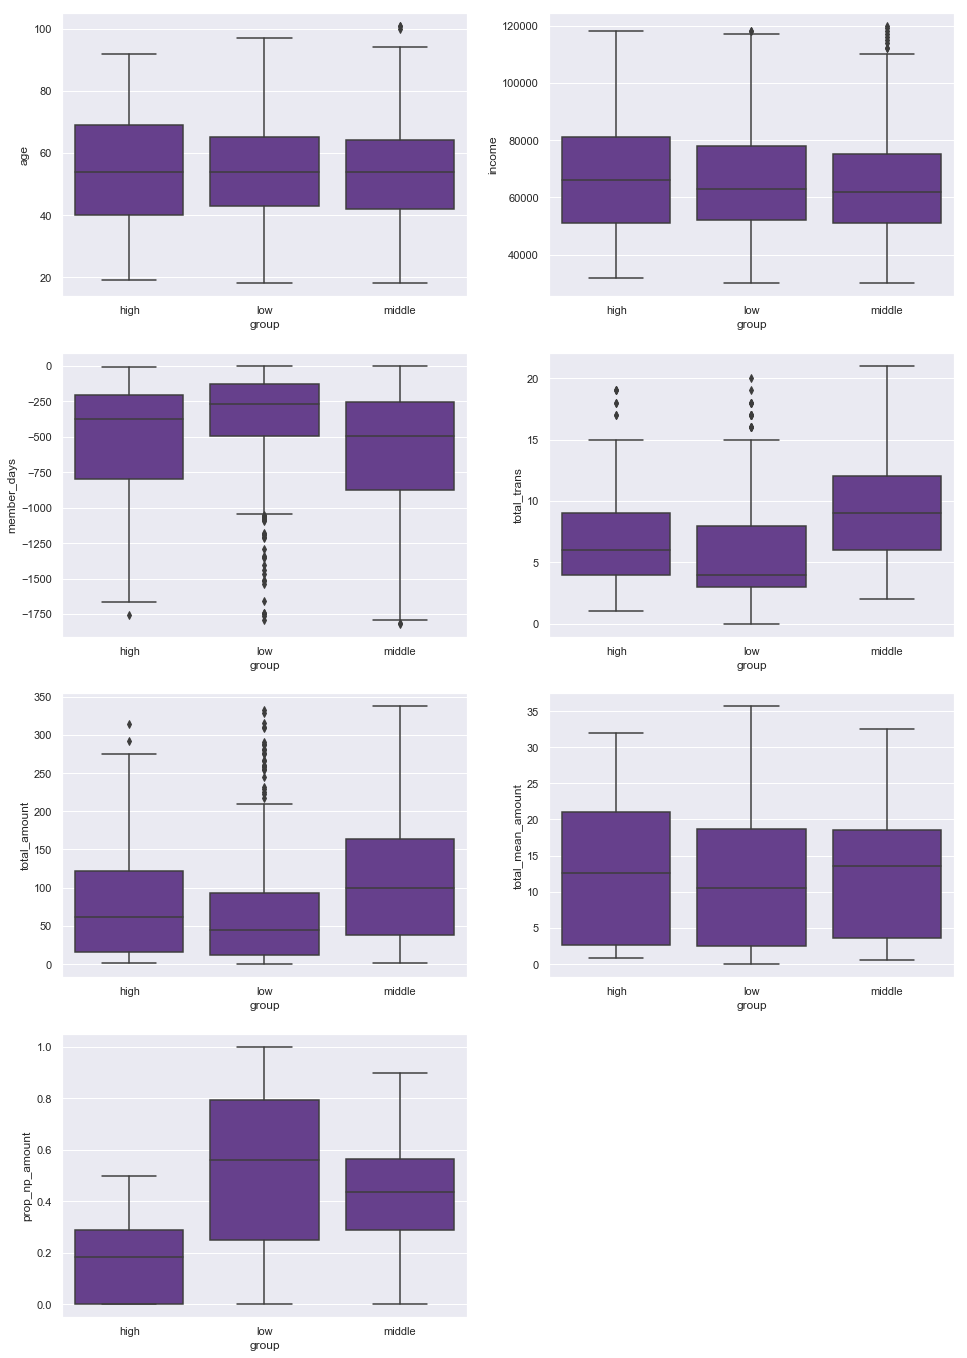

In [63]:
print_boxplots_types('info')

In [80]:
two_types = profile_type.loc[(profile_type['bogo_viewed'] >= 2) & (profile_type['discount_viewed'] >= 2)
                            & (profile_type['bogo_viewed'] == profile_type['discount_viewed'])]

print("number of customers: ", len(two_types))

number of customers:  1186


C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


group     gender
bogo      F         0.106239
          M         0.099494
          O         0.002530
discount  M         0.349916
          F         0.271501
          O         0.007589
Name: gender, dtype: float64


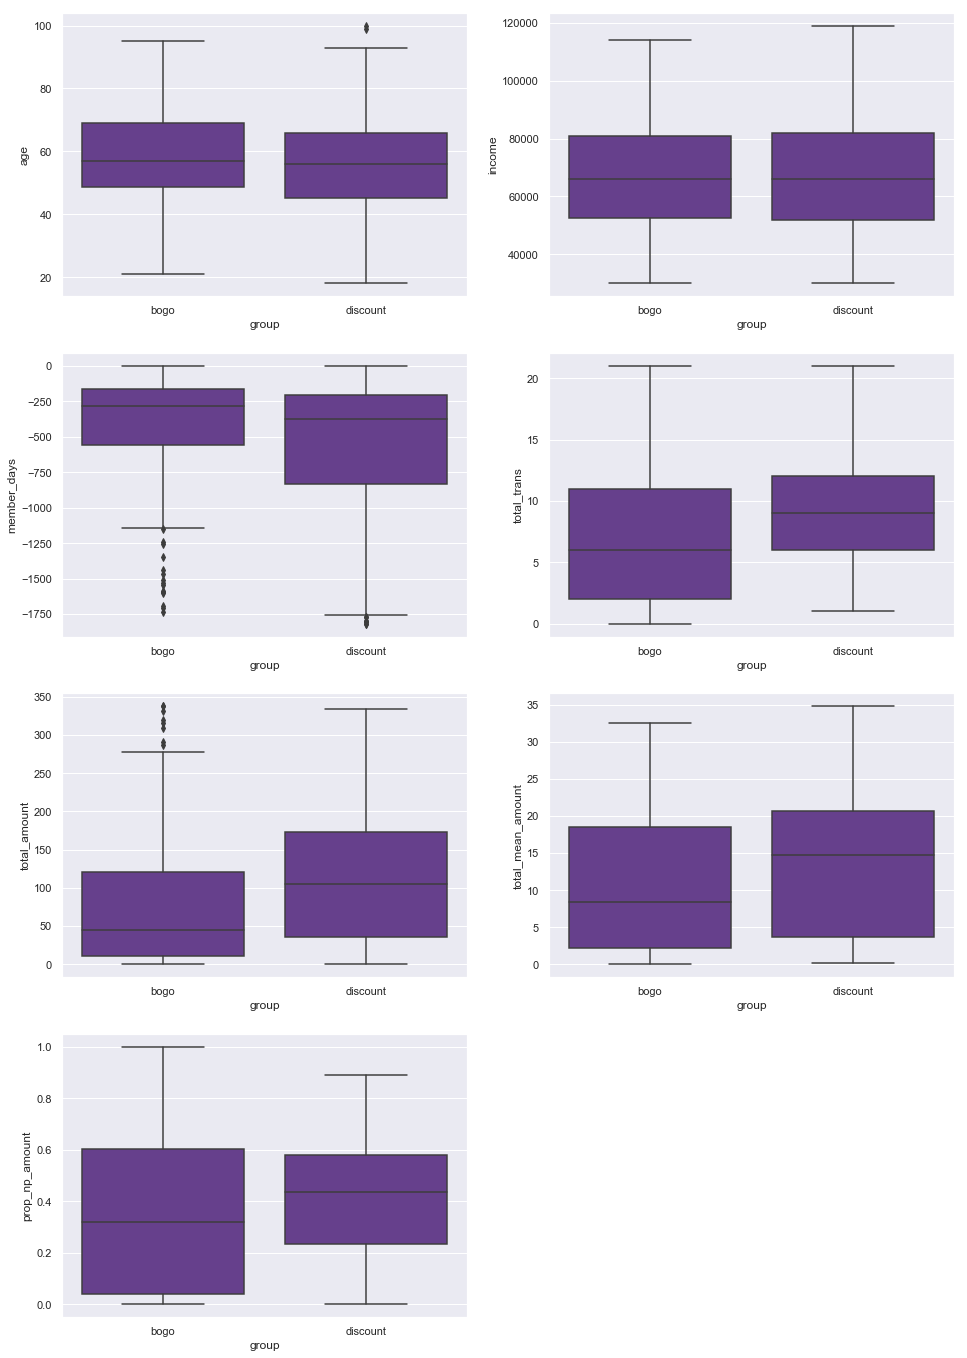

In [81]:
two_types['group'] = np.where((two_types['bogo_amount'] >= 1.5 * two_types['discount_amount']), 'bogo', 'discount')
two_types = two_types[['age', 'income', 'member_days', 'total_trans', 'total_amount', 'total_mean_amount',
                            'prop_np_amount', 'group', 'gender']]

print(two_types.groupby(['group'])['gender'].value_counts() / len(two_types))
EDA.plot_num_corrBox(two_types, 'group', figsize=(16, 24))

---